In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# noise = 0.1 -> A high noise ( ~ 0.8) will cause the data points to become overly convoluted, so its better to keep it relatively low
# factor -> Relative size between the inner and outer circle


n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)


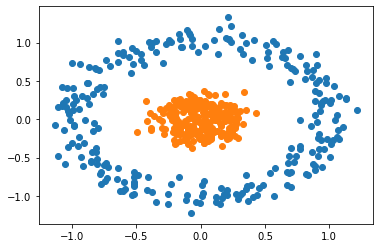

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
# By making it 'Dense', it means that every layer is connected to its preceeding layer
# We have one input layer with 2 nodes and 4 hidden layers and a output layer all interconnected with each other
# Since our layer has only 2 forms of i/p, 0 or 1 hence binary cross entropy
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics = ['accuracy'])


In [5]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true' )

Epoch 1/100
500/500 [==============================] - 0s 356us/step - loss: 0.8464 - accuracy: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 155us/step - loss: 0.7314 - accuracy: 0.5000
Epoch 3/100
500/500 [==============================] - 0s 153us/step - loss: 0.6994 - accuracy: 0.5000
Epoch 4/100
500/500 [==============================] - 0s 152us/step - loss: 0.6959 - accuracy: 0.5140
Epoch 5/100
500/500 [==============================] - 0s 137us/step - loss: 0.6954 - accuracy: 0.3680
Epoch 6/100
500/500 [==============================] - 0s 145us/step - loss: 0.6949 - accuracy: 0.3540
Epoch 7/100
500/500 [==============================] - 0s 148us/step - loss: 0.6954 - accuracy: 0.4080
Epoch 8/100
500/500 [==============================] - 0s 150us/step - loss: 0.6948 - accuracy: 0.4520
Epoch 9/100
500/500 [==============================] - 0s 160us/step - loss: 0.6941 - accuracy: 0.4480
Epoch 10/100
500/500 [==============================] - 0s 149us/step - l

500/500 [==============================] - 0s 68us/step - loss: 0.2183 - accuracy: 0.9300
Epoch 81/100
500/500 [==============================] - 0s 68us/step - loss: 0.2129 - accuracy: 0.9340
Epoch 82/100
500/500 [==============================] - 0s 62us/step - loss: 0.2083 - accuracy: 0.9500
Epoch 83/100
500/500 [==============================] - 0s 62us/step - loss: 0.2032 - accuracy: 0.9480
Epoch 84/100
500/500 [==============================] - 0s 66us/step - loss: 0.1988 - accuracy: 0.9480
Epoch 85/100
500/500 [==============================] - 0s 59us/step - loss: 0.1939 - accuracy: 0.9580
Epoch 86/100
500/500 [==============================] - 0s 62us/step - loss: 0.1897 - accuracy: 0.9580
Epoch 87/100
500/500 [==============================] - 0s 71us/step - loss: 0.1848 - accuracy: 0.9820
Epoch 88/100
500/500 [==============================] - 0s 67us/step - loss: 0.1809 - accuracy: 0.9840
Epoch 89/100
500/500 [==============================] - 0s 75us/step - loss: 0.1766 - 

## We reach our maximum accuracy at higher epochs compared to our previous perceptron model

Text(0.5, 1.0, 'accuracy')

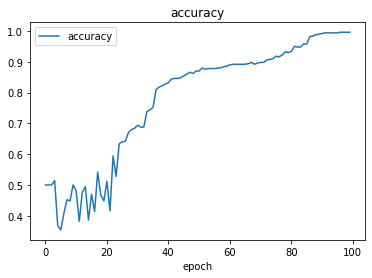

In [6]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

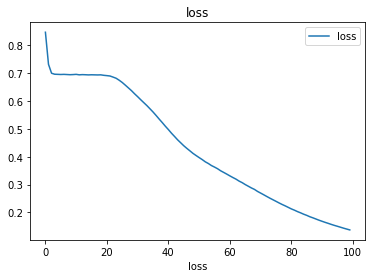

In [7]:
plt.plot(h.history['loss'])
plt.xlabel('loss')
plt.legend(['loss'])
plt.title('loss')

In [8]:
def plot_decision_boundary(X, y, model) :
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    predictions_func = model.predict(grid)
    z = predictions_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

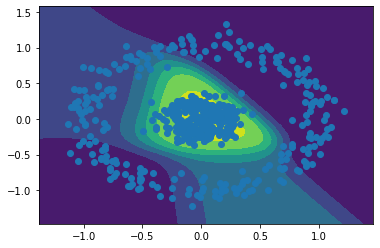

In [9]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

## Testing our model how well it can predict

Prediction is [[0.09796192]]


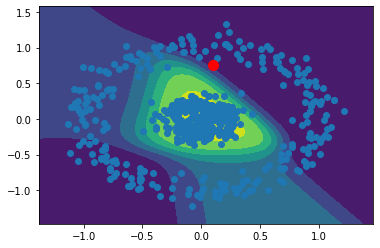

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0.75
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)

### With a value close to 0, the point is placed outside the contour of the inner circle which means that it has a probability less than 1 and hence away from the area that denotes of having probability = 1